# Mock Draft 2016

## Just how accurate are the "experts"?

In [22]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from sklearn import feature_selection

Read in .csv file containing first round draft predictions from ESPN (Todd McShay and/or Mel Kiper), Bleacher Report, and Walter Football

In [4]:
pd.read_csv("~/Desktop/draft_mock_plus_stats.csv").head()

,Team,Year,ESPN,BleacherReport,WalterFootball,OffensiveBias,IsOffense
0,Arizona Cardinals,2006,1.0,1.0,1.0,-11,1.0
1,Atlanta Falcons,2006,1.0,0.0,0.0,-10,0.0
2,Baltimore Ravens,2006,1.0,1.0,0.0,16,1.0
3,Buffalo Bills,2006,0.0,0.0,0.0,12,1.0
4,Carolina Panthers,2006,0.0,0.0,0.0,17,0.0


Load in the relevant data and omit teams with no first round draft pick from the model:

In [5]:
all_teams=pd.read_csv("draft_mock_plus_stats.csv")
picks=all_teams.dropna(subset=['IsOffense'])
print picks.head()

                Team  Year  ESPN  BleacherReport  WalterFootball  \
0  Arizona Cardinals  2006   1.0             1.0             1.0   
1    Atlanta Falcons  2006   1.0             0.0             0.0   
2   Baltimore Ravens  2006   1.0             1.0             0.0   
3      Buffalo Bills  2006   0.0             0.0             0.0   
4  Carolina Panthers  2006   0.0             0.0             0.0   

   OffensiveBias  IsOffense  
0            -11        1.0  
1            -10        0.0  
2             16        1.0  
3             12        1.0  
4             17        0.0  


In [35]:
df = pd.DataFrame(picks)
#print df
data_array = df.as_matrix()

In [36]:
exp_preds = data_array[:, 2:5]
print exp_preds.shape
#print exp_preds
actual_pick = data_array[:,6]
exp_preds = pd.DataFrame(exp_preds, columns=['ESPN', 'BeacherReport', 'WalterFootball'])
#actual_pick = pd.DataFrame(actual_pick, columns=['IsOffense'])
#print actual_pick

print exp_preds.shape
print actual_pick.shape


X_train, X_test, y_train, y_test = cross_validation.train_test_split(exp_preds, actual_pick, test_size=0.25, random_state=3)

X_train.shape, y_train.shape


(255, 3)
(255, 3)
(255,)


((191, 3), (191,))

### Logistic Regression

In [28]:
logreg = LogisticRegression()
scores=cross_val_score(logreg, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.61538462  0.84615385  0.61538462  0.80769231  0.65384615  0.73076923
  0.8         0.68        0.64        0.75      ]
0.713923076923


In [29]:
logreg_model = logreg.fit(X_train, y_train.astype(int))
print logreg_model.score(X_train, y_train.astype(int))
print logreg_model.predict([[1,0,0]])
print logreg_model.predict([[0,1,0]])
print logreg_model.predict([[0,0,1]])
print logreg_model.predict([[0,1,1]])

0.706806282723
[1]
[0]
[0]
[0]


### Random Forest


In [30]:
rf_model = RandomForestClassifier()
scores=cross_val_score(rf_model, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
#rf_model = rf_model.fit(X_train, y_train)
print scores
print scores.mean()

[ 0.61538462  0.80769231  0.61538462  0.69230769  0.57692308  0.73076923
  0.76        0.68        0.64        0.75      ]
0.686846153846


### Support Vector Machine

In [31]:
svm_model=svm.SVC()
scores=cross_val_score(svm_model, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.65384615  0.80769231  0.61538462  0.73076923  0.57692308  0.65384615
  0.72        0.64        0.64        0.70833333]
0.674679487179


In [34]:
#print exp_preds
feature_selection.f_classif(exp_preds, np.array(actual_pick.astype(int)))

(array([ 46.23426093,  19.66577474,  30.79121339]),
 array([  7.51483288e-11,   1.37627386e-05,   7.23761167e-08]))

### K-Nearest Neighbors

In [12]:
k_range=range(1,51)
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores
avg_kscore = sum(k_scores)/len(k_scores)


[0.61575641025641015, 0.61607692307692308, 0.59251282051282061, 0.63623076923076927, 0.62838461538461532, 0.68700000000000006, 0.64746153846153842, 0.67146153846153844, 0.66761538461538461, 0.68315384615384622, 0.66376923076923078, 0.69069230769230761, 0.70623076923076922, 0.69469230769230772, 0.68284615384615388, 0.68284615384615388, 0.69053846153846155, 0.68284615384615388, 0.69038461538461537, 0.67052564102564094, 0.67837179487179489, 0.70191025641025639, 0.69038461538461537, 0.69438461538461538, 0.68638461538461537, 0.69038461538461537, 0.68621794871794872, 0.69038461538461537, 0.69775641025641022, 0.69038461538461537, 0.69775641025641022, 0.69021794871794862, 0.68621794871794872, 0.68621794871794872, 0.68621794871794872, 0.69791025641025628, 0.69391025641025639, 0.69391025641025639, 0.68621794871794872, 0.69021794871794862, 0.68621794871794872, 0.68621794871794872, 0.69391025641025639, 0.68621794871794872, 0.68621794871794872, 0.68621794871794872, 0.68621794871794872, 0.6902179487

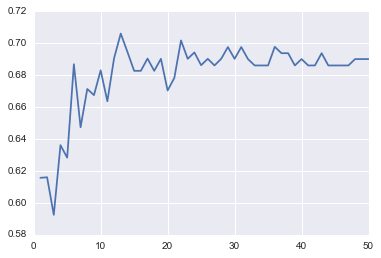

In [13]:
plt.plot(k_range, k_scores)
plt.show()

#### Max accuracy at k=13

Now what happens to accuracy when we also consider stats from previous season?

In [14]:
exp_preds = data_array[:, 2:6]
print exp_preds.shape
#print exp_preds
actual_pick = data_array[:,6]
exp_preds = pd.DataFrame(exp_preds, columns=['ESPN', 'BeacherReport', 'WalterFootball', 'OffensiveBias'])
#actual_pick = pd.DataFrame(actual_pick, columns=['IsOffense'])
print actual_pick

print exp_preds.shape
print actual_pick.shape


X_train, X_test, y_train, y_test = cross_validation.train_test_split(exp_preds, actual_pick, test_size=0.25, random_state=3)

X_train.shape, y_train.shape

(255, 4)
[1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0
 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0
 0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0
 0.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0
 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0
 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0
 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0
 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0
 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0
 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0
 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0
 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1

((191, 4), (191,))

### Logistic Regression

In [16]:
logreg = LogisticRegression()
scores=cross_val_score(logreg, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.61538462  0.84615385  0.69230769  0.84615385  0.69230769  0.65384615
  0.8         0.56        0.68        0.625     ]
0.701115384615


### Random Forest

In [18]:
rf_model = RandomForestClassifier()
scores=cross_val_score(rf_model, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
#rf_model = rf_model.fit(X_train, y_train)
print scores
print scores.mean()

[ 0.65384615  0.65384615  0.57692308  0.61538462  0.61538462  0.53846154
  0.52        0.6         0.56        0.625     ]
0.595884615385


### Support Vector Machine

In [19]:
svm_model=svm.SVC()
scores=cross_val_score(svm_model, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.65384615  0.61538462  0.53846154  0.73076923  0.69230769  0.57692308
  0.44        0.48        0.64        0.5       ]
0.586769230769


### K-Nearest Neighbors


In [20]:
k_range=range(1,51)
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores
avg_kscore = sum(k_scores)/len(k_scores)


[0.58755128205128215, 0.63064102564102564, 0.55537179487179489, 0.60198717948717939, 0.59794871794871784, 0.6327435897435898, 0.60566666666666669, 0.58533333333333337, 0.59720512820512828, 0.59397435897435902, 0.56193589743589745, 0.578102564102564, 0.57779487179487166, 0.5901153846153846, 0.59060256410256406, 0.61414102564102557, 0.60678205128205132, 0.57535897435897432, 0.59123076923076912, 0.57984615384615379, 0.59091025641025641, 0.56766666666666665, 0.60661538461538456, 0.58721794871794863, 0.59861538461538466, 0.57921794871794874, 0.58658974358974358, 0.57441025641025634, 0.58658974358974358, 0.58211538461538459, 0.56656410256410239, 0.57520512820512826, 0.57520512820512815, 0.57505128205128209, 0.55117948717948706, 0.57073076923076915, 0.56674358974358974, 0.55519230769230765, 0.55919230769230766, 0.57520512820512826, 0.57088461538461543, 0.56703846153846149, 0.5785769230769231, 0.55903846153846148, 0.55919230769230777, 0.57088461538461532, 0.57489743589743592, 0.574897435897435

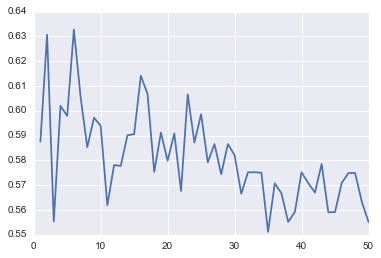

In [21]:
plt.plot(k_range, k_scores)
plt.show()

ValueError: Input X must be non-negative.